In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ds=pd.read_csv("Students_Grading_Dataset.csv", encoding="Latin-1")
ds

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4


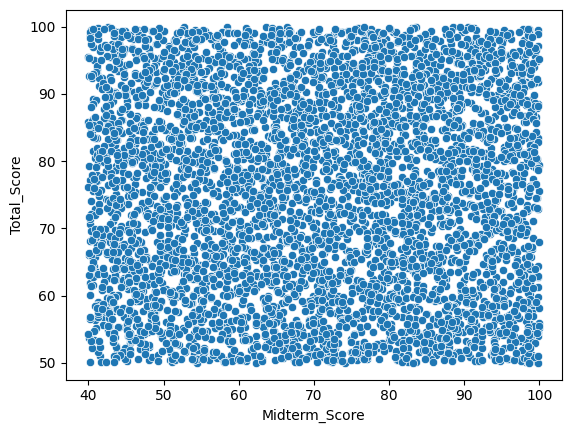

In [ ]:
sns.scatterplot(x=ds["Midterm_Score"], y=ds["Total_Score"])
plt.show()

In [ ]:
# Filling missing values

ds["Assignments_Avg"]=round(ds["Assignments_Avg"].fillna(ds["Assignments_Avg"].mean()),2)
ds["Assignments_Avg"].isnull().sum()

np.int64(0)

In [ ]:
# New column

ds["New Scores"]=ds[["Midterm_Score","Final_Score","Assignments_Avg","Quizzes_Avg","Participation_Score","Projects_Score"]].mean(axis=1)
ds["New Scores"]

,New Scores
0,60.170000
1,62.673333
2,65.495000
3,64.441667
4,63.403333
...,...
4995,64.218333
4996,60.441667
4997,59.668333
4998,68.523333


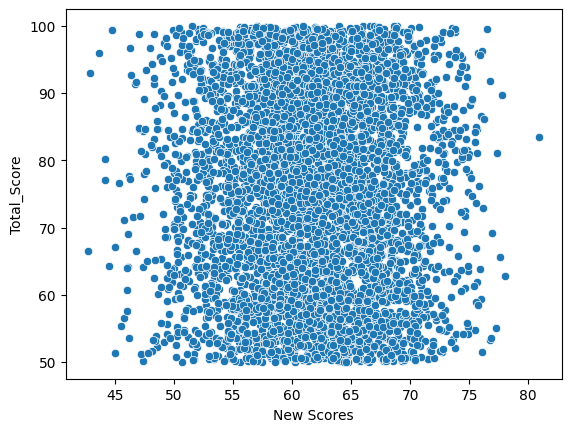

In [ ]:
sns.scatterplot(x=ds["New Scores"], y=ds["Total_Score"])
plt.show()

In [ ]:
# Normalizing

arr1=np.array(ds["New Scores"])
arr2=np.array(ds["Total_Score"])

std=np.std(arr1)
mean=np.mean(arr1)

std2=np.std(arr2)
mean2=np.mean(arr2)

norm_arr=(arr1-mean)/std
norm_arr2=(arr2-mean2)/std2

ds["New Scores"]=norm_arr
ds["Total_Score"]=norm_arr2

In [ ]:
# Dividing the data into dependent and independent features.

x=ds[["New Scores"]]
y=ds["Total_Score"]

In [ ]:
# Training and testing the dataset

from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
x_train.shape, x_test.shape

((4000, 1), (1000, 1))

In [ ]:
y_train.shape, y_test.shape

((4000,), (1000,))

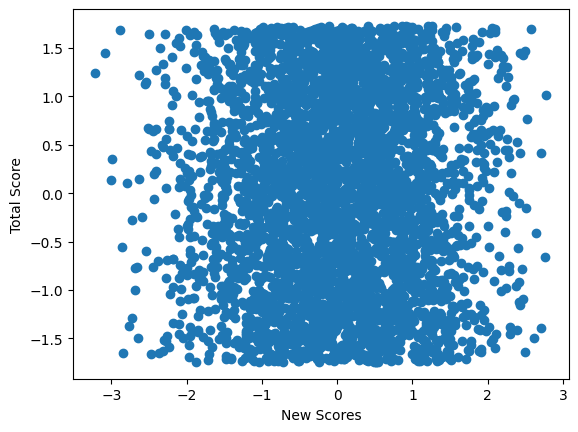

In [ ]:
plt.scatter(x_train, y_train)
plt.xlabel("New Scores")
plt.ylabel("Total Score")
plt.show()

In [ ]:
# Model training

from sklearn.linear_model import LinearRegression

model=LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.intercept_

np.float64(0.0018457866233795228)

In [ ]:
model.coef_

array([0.00526268])

In [ ]:
# Prediction for test data

y_pred=model.predict(x_test)
y_pred

array([-1.66968912e-04, -6.23296895e-03, -6.04137930e-03, -7.14583440e-04,
        6.18264416e-03, -9.87636413e-04,  2.42175431e-03,  5.82812787e-03,
       -7.13811693e-03, -2.96538475e-03,  5.23978168e-03, -1.36176424e-03,
        9.19226119e-03, -1.40400448e-03, -4.53581649e-03, -2.65461727e-03,
       -6.11228255e-03, -1.46585626e-03,  3.76740764e-03,  1.56337231e-03,
        4.95297692e-04, -6.73230892e-03, -7.92408709e-03, -5.25390055e-03,
        1.02045183e-02, -9.44171854e-03, -7.02514800e-04, -4.02440788e-03,
       -1.09714186e-02,  8.70934104e-04, -8.78548625e-03,  9.81832188e-03,
        1.41854863e-03,  4.19584435e-03,  4.07214079e-03, -2.40117584e-03,
        6.92939124e-03, -7.30556931e-03,  2.07158919e-04, -4.16923156e-03,
        4.75703609e-03,  3.26336736e-04, -3.37873566e-03,  3.66029846e-03,
       -1.58503408e-03,  3.20621589e-03,  3.97408309e-03,  5.01332012e-04,
        1.01575778e-03,  7.18567527e-04, -7.28444919e-03, -2.50677644e-03,
       -5.50281625e-03, -

In [ ]:
# Performance metrics

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse=mean_squared_error(y_test, y_pred)
mse

1.0098808882526362

In [ ]:
mae=mean_absolute_error(y_test, y_pred)
mae

0.8726574944860054

In [ ]:
rmse=np.sqrt(mse)
rmse

np.float64(1.004928300055599)

In [ ]:
r2=r2_score(y_test, y_pred)
r2

-0.0004264724422198274

In [ ]:
# Model Deployment

import pickle

# Filepath for saving the model
pickle_file_path = 'lr.pkl'

# Save the trained model to a pickle file
with open(pickle_file_path, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved to {pickle_file_path}')

# Load the model from the pickle file
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Test the loaded model with predictions
y_pred_loaded = loaded_model.predict(x_test)
print(y_pred_loaded)

Model saved to lr.pkl
[-1.66968912e-04 -6.23296895e-03 -6.04137930e-03 -7.14583440e-04
  6.18264416e-03 -9.87636413e-04  2.42175431e-03  5.82812787e-03
 -7.13811693e-03 -2.96538475e-03  5.23978168e-03 -1.36176424e-03
  9.19226119e-03 -1.40400448e-03 -4.53581649e-03 -2.65461727e-03
 -6.11228255e-03 -1.46585626e-03  3.76740764e-03  1.56337231e-03
  4.95297692e-04 -6.73230892e-03 -7.92408709e-03 -5.25390055e-03
  1.02045183e-02 -9.44171854e-03 -7.02514800e-04 -4.02440788e-03
 -1.09714186e-02  8.70934104e-04 -8.78548625e-03  9.81832188e-03
  1.41854863e-03  4.19584435e-03  4.07214079e-03 -2.40117584e-03
  6.92939124e-03 -7.30556931e-03  2.07158919e-04 -4.16923156e-03
  4.75703609e-03  3.26336736e-04 -3.37873566e-03  3.66029846e-03
 -1.58503408e-03  3.20621589e-03  3.97408309e-03  5.01332012e-04
  1.01575778e-03  7.18567527e-04 -7.28444919e-03 -2.50677644e-03
 -5.50281625e-03 -1.07664263e-03  7.57790606e-04 -4.27953246e-04
  1.07157524e-03  1.92241434e-03 -7.23014031e-03  4.44325146e-03
 -6